In [2]:
import os, sys
path = os.chdir(os.getcwd()+"/..")
print(path)
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

import matplotlib.pyplot as plt

%matplotlib inline

import Ensembler
import Ensembler.visualisation.plotPotentials as vis


params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)


None


# Simple Potentials

## Harmonic Oscillartor

Wall time: 2.99 ms


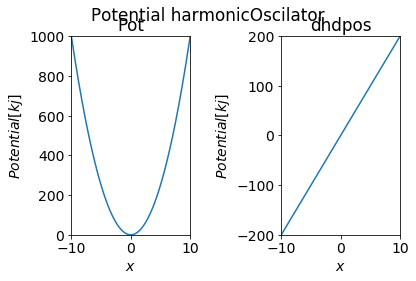

In [25]:
#Setup
##Build Potential
ho = Ensembler.potentials.OneD.harmonicOsc(x_shift=0, fc=20)
##sample positions
positions = np.linspace(-10,10, 1000)

##calculate Energies and get their time
%time  V = ho.ene(positions)

##plot potential
fig, axes = vis.plot_1DPotential_Term(ho, positions=positions)


# Flatwell

Wall time: 997 µs


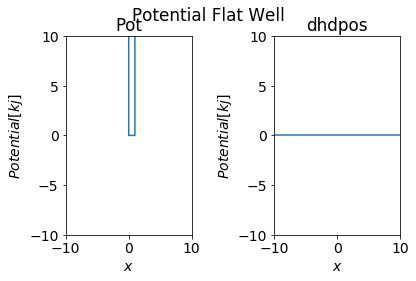

In [28]:
#Setup
##Build Potential
fw = Ensembler.potentials.OneD.flat_well()

##sample positions
positions = np.linspace(-10,10, 1000)

##calculate Energies and get their time
%time  V = fw.ene(positions)

##plot potential
fig, axes = vis.plot_1DPotential_Term(fw, positions=positions, y_range=[-10,10])


# Lennard Jones


Wall time: 997 µs


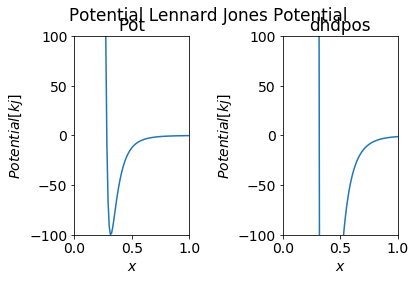

In [33]:
#Setup
##Build Potential
lj= Ensembler.potentials.OneD.lennardJonesPotential(c6=0.2,c12=0.0001)

##sample positions
positions=np.linspace(0.0000001,1,100)

##calculate Energies and get their time
%time V = lj.ene(positions)

##plot potential
ig, axes = vis.plot_1DPotential_Term(lj, positions=positions, y_range=[-100,100])


Wall time: 3.98 ms


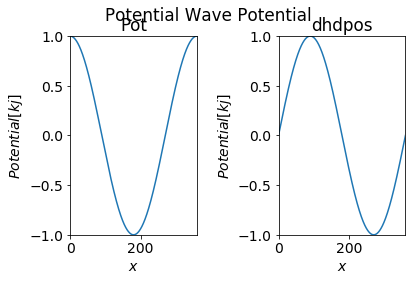

In [32]:
#Setup
##Build Potential
wv = Ensembler.potentials.OneD.wavePotential()

##sample positions
positions=np.linspace(0,360,1000)

##calculate Energies and get their time
%time V = wv.ene(positions)

##plot potential
ig, axes = vis.plot_1DPotential_Term(wv, positions=positions, y_range=[-1,1])

# Perturbed Potentials

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
#import src.Ensembler  as cvb
import src.system as system1D 
from src.potentials.OneD import harmonicOsc, pertHarmonicOsc, linCoupledHosc, expCoupledHosc



## Header 1


In [4]:
#Set Up
##Build Potential
pot_stretch = pertHarmonicOsc()
pot_lin_strech = linCoupledHosc(ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=11.0, x_shift=0.0))
pot_exp_strech = expCoupledHosc(ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=11.0, x_shift=0.0), s=0.025, temp=300.0)

##Sample Space:
x=np.linspace(-10, 10, 1000)
lam=np.linspace(0,1,100)


In [10]:
%%timeit
#collect energies of potential
energy_map_lin = []
energy_map_exp = []

for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)
    
    #calculate Energies for given lam
    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))


UsageError: Line magic function `%%timeit` not found.


Text(0.5, 1.0, 'Exponential')

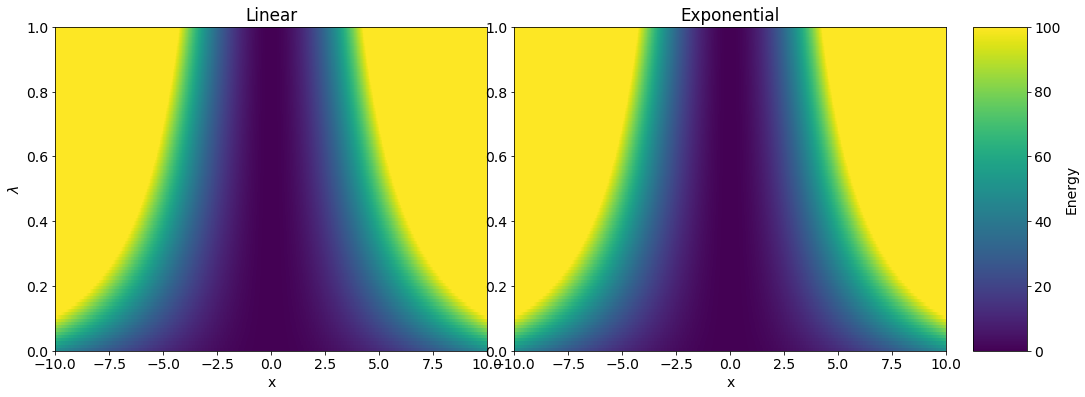

In [11]:
#recalc V landscape as timeit does not allow using them
##collect energies of potential
energy_map_lin = []
energy_map_exp = []

for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)
    
    #calculate Energies for given lam
    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))

#Plot the results:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0.05, 0.05, 0.4, 0.9])
ax2 = fig.add_axes([0.475, 0.05, 0.4, 0.9])
ax3 = fig.add_axes([0.9, 0.05, 0.05, 0.9])          


surf = ax1.imshow(energy_map_lin, cmap="viridis", interpolation="nearest",
                 origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto")
surf = ax2.imshow(energy_map_exp, cmap="viridis", interpolation="nearest",
                 origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto")
colorbar.Colorbar(ax3, surf, label='Energy')
for a in [ax1, ax2]:
    a.set_xlim(-10,10)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('Linear')
ax2.set_title('Exponential')


Text(0.5, 0, '$r$')

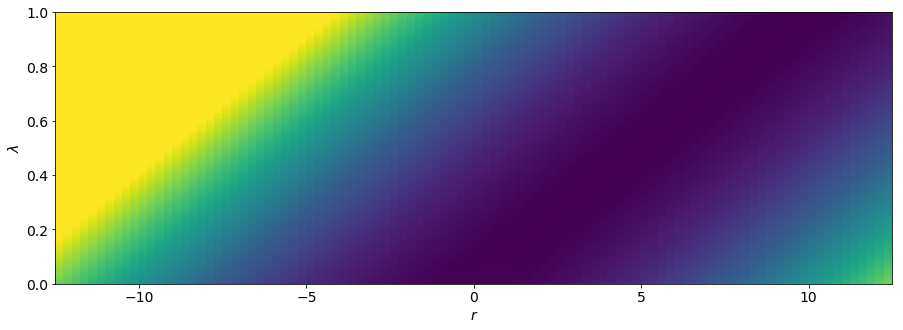

In [12]:
# Here a niche explanative comment should be present
pot_x_shift=pertHarmonicOsc(fc=1.0, alpha=0.0, gamma=10.0)
x=np.linspace(-12.5, 12.5, 100)
lam=np.linspace(0,1,100)
#xx, ll = np.meshgrid(x, lam)

energy_map_pot_x_shift = []
for lamb in lam:
    pot_x_shift.set_lam(lamb)
    row = pot_x_shift.ene(list(x))
    energy_map_pot_x_shift.append(row)              
energy_map_pot_x_shift = np.array(energy_map_pot_x_shift)

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
surf = ax.imshow(energy_map_pot_x_shift, cmap="viridis", interpolation="nearest",
             origin='center', extent=[min(x), max(x), min(lam), max(lam)],  vmax=100, vmin=0, aspect="auto" )
ax.set_ylabel("$\lambda$")
ax.set_xlabel("$r$")

## Header 2

In [13]:
#Set Up
##Build Potential
pot_lin_x_shift=linCoupledHosc(ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0))
pot_exp_x_shift=expCoupledHosc(ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0)

##Sample Space:
x=np.linspace(-10, 10, 100)
lam=np.linspace(0,1,100)

In [14]:
%%timeit
#collect energies of potential
energy_map_lin = []
energy_map_exp = []
energy_map_exp_x_shift = []
for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)
    pot_exp_x_shift.set_lam(y)
    
    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))
    energy_map_exp_x_shift.append(pot_exp_x_shift.ene(x))
energy_map_lin = np.array(energy_map_lin)
energy_map_exp = np.array(energy_map_exp)
energy_map_exp_x_shift = np.array(energy_map_exp_x_shift)




181 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0.5, 1.0, 'Exponential')

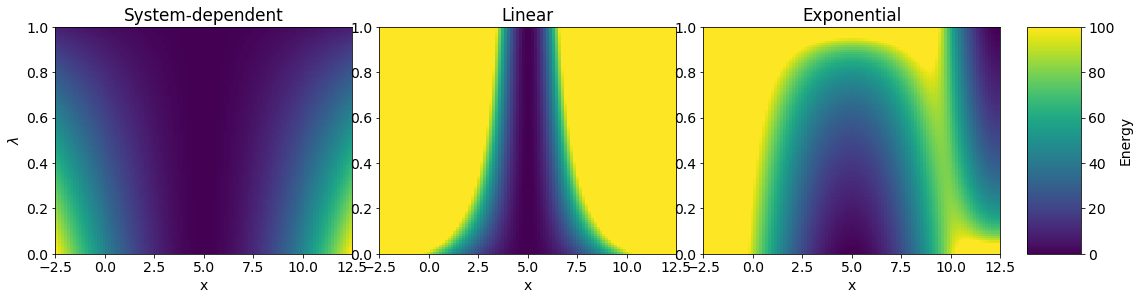

In [16]:
#recalc V landscape as timeit does not allow using them
##collect energies of potential
energy_map_lin = []
energy_map_exp = []
energy_map_exp_x_shift = []
for y in lam:
    pot_lin_strech.set_lam(y)
    pot_exp_strech.set_lam(y)
    pot_exp_x_shift.set_lam(y)
    
    energy_map_lin.append(pot_lin_strech.ene(x))
    energy_map_exp.append( pot_lin_strech.ene(x))
    energy_map_exp_x_shift.append(pot_exp_x_shift.ene(x))
energy_map_lin = np.array(energy_map_lin)
energy_map_exp = np.array(energy_map_exp)
energy_map_exp_x_shift = np.array(energy_map_exp_x_shift)


#plot results
fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0.05, 0.05, 0.275, 0.9])
ax2 = fig.add_axes([0.35, 0.05, 0.275, 0.9])
ax3 = fig.add_axes([0.65, 0.05, 0.275, 0.9])
ax4 = fig.add_axes([0.95, 0.05, 0.05, 0.9])

#ax = fig.gca(projection='3d')
ax1.imshow(energy_map_lin, extent=(-2.5, 12.5, 0, 1), aspect='auto')#scatter(xx, ll, c=pot_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
ax2.imshow(energy_map_exp, origin='lower', extent=(-2.5, 12.5, 0, 1), aspect='auto', vmax=25)#scatter(xx, ll, c=pot_lin_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')
ax3.imshow(energy_map_exp_x_shift, origin='lower', extent=(-2.5, 12.5, 0, 1), aspect='auto', vmax=25)#scatter(xx, ll, c=pot_lin_x_shift.ene(ll, xx), cmap=cm.viridis, vmin=0, vmax=25, edgecolors='face')

colorbar.Colorbar(ax4, surf, label='Energy')
for a in [ax1, ax2, ax3]:
    a.set_xlim(-2.5,12.5)
    a.set_ylim(0, 1)
    a.set_xlabel('x')
ax1.set_ylabel('$\lambda$')
ax1.set_title('System-dependent')
ax2.set_title('Linear')

ax3.set_title('Exponential')
